# Datos prueba WiFi sniffer 1 hora ruta M57 de transmilenio

In [50]:
from PIL import Image
from scipy.misc import toimage
from scipy.misc import imshow
from IPython.display import Image
 
import numpy as np
from numpy import genfromtxt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import figure
from matplotlib import cm
import matplotlib.image as mpimg
from scipy import stats
import operator as op
import pandas as pd
from ast import literal_eval
from mpl_toolkits.mplot3d import Axes3D
import math
import sys
from numpy import genfromtxt


In [2]:
wifitm = pd.read_csv("wifitm1clean") 
wifitmVal = wifitm.values

In [3]:
print(wifitm.shape)
print(wifitm[123:][:7].mac)
mac = wifitm.mac
type_t = wifitm.type
print(mac.values)
print(type_t.values)
print(wifitm.values)

(118420, 4)
123    4c:12:65:5c:f5:bd
124    10:c2:5a:50:cb:d1
125    4c:12:65:5c:f5:bd
126    10:c2:5a:50:cb:d1
127    58:23:8c:e8:47:53
128    5a:23:8c:e8:47:54
129    58:23:8c:e8:47:53
Name: mac, dtype: object
['4c:12:65:5c:f5:bd' '58:23:8c:e8:47:53' '5a:23:8c:e8:47:54' ...
 'b0:7f:b9:94:61:70' '58:23:8c:04:47:4f' '14:ab:f0:1d:db:e0']
['80' '80' '80' ... '80' '80' '80']
[[2353482 -90 '80' '4c:12:65:5c:f5:bd']
 [2354980 -94 '80' '58:23:8c:e8:47:53']
 [2354982 -93 '80' '5a:23:8c:e8:47:54']
 ...
 [6987232 -76 '80' 'b0:7f:b9:94:61:70']
 [6987260 -95 '80' '58:23:8c:04:47:4f']
 [6987307 -92 '80' '14:ab:f0:1d:db:e0']]


# Mac occurrence counting

In [4]:
macArr = mac.values 
typeArr = type_t.values
print(macArr.shape)
print(macArr)
macStrArr = macArr.astype(str)
print(np.sum(np.char.count(macStrArr, '4c:12:65:5c:f5:bd')))
print(np.sum(np.char.count(macStrArr, macArr[0])))

(118420,)
['4c:12:65:5c:f5:bd' '58:23:8c:e8:47:53' '5a:23:8c:e8:47:54' ...
 'b0:7f:b9:94:61:70' '58:23:8c:04:47:4f' '14:ab:f0:1d:db:e0']
64
64


In [5]:
macDictionary = {}
run = 0
for maci in macArr:
     sys.stdout.write("\r Iteration " + str(run))
     sys.stdout.flush()
     run = run + 1
     if maci not in macDictionary:
            macDictionary[maci] = np.sum(np.char.count(macStrArr, maci))
     
       
        
print(macDictionary)

 Iteration 118419{'4c:12:65:5c:f5:bd': 64, '58:23:8c:e8:47:53': 131, '5a:23:8c:e8:47:54': 114, '98:97:d1:9b:bd:f8': 162, '00:87:01:75:86:e4': 1, 'd0:6f:82:0d:ca:00': 237, '34:57:60:ec:ae:40': 108, 'e4:a4:71:e5:f2:ef': 277, '00:9a:cd:bc:ff:e3': 974, '80:58:f8:c1:2a:6c': 102, '98:6b:3d:79:e9:b0': 128, '10:c2:5a:50:cb:d1': 130, 'fc:b4:e6:c5:ee:2a': 99, 'fc:52:8d:75:26:62': 2, 'c8:14:51:96:39:fd': 1, 'da:a1:19:96:9d:9a': 1, '34:14:5f:d8:1d:a7': 2, '78:29:ed:6d:3d:a9': 2, '18:01:f1:3b:9f:03': 3, 'f8:84:f2:4d:23:a7': 9, 'cc:61:e5:18:27:eb': 422, 'b0:c2:87:21:bc:6a': 43, 'b2:c2:87:21:bc:6b': 45, '78:71:9c:47:52:b0': 50, 'bc:ca:b5:d2:c7:d0': 101, '84:c9:c6:90:5f:79': 34, 'e0:67:b3:2d:c3:b6': 37, '58:c5:cb:d2:69:27': 2, '10:fe:ed:cf:78:b6': 51, '5c:03:39:b4:43:d2': 8, '54:a6:19:4c:c2:90': 117, 'e0:67:b3:74:cb:f8': 28, '98:6b:3d:07:3d:90': 3, '84:c9:c6:90:ba:a9': 28, 'fc:b4:e6:86:7a:dc': 30, '78:29:ed:50:22:a9': 25, 'bc:ca:b5:39:e7:30': 24, '46:32:c8:5e:95:c5': 19, '44:32:c8:5e:95:c4': 19, 'a0:9

([<matplotlib.axis.XTick at 0x1cb939ab668>,
  ...],
 <a list of 9357 Text xticklabel objects>)

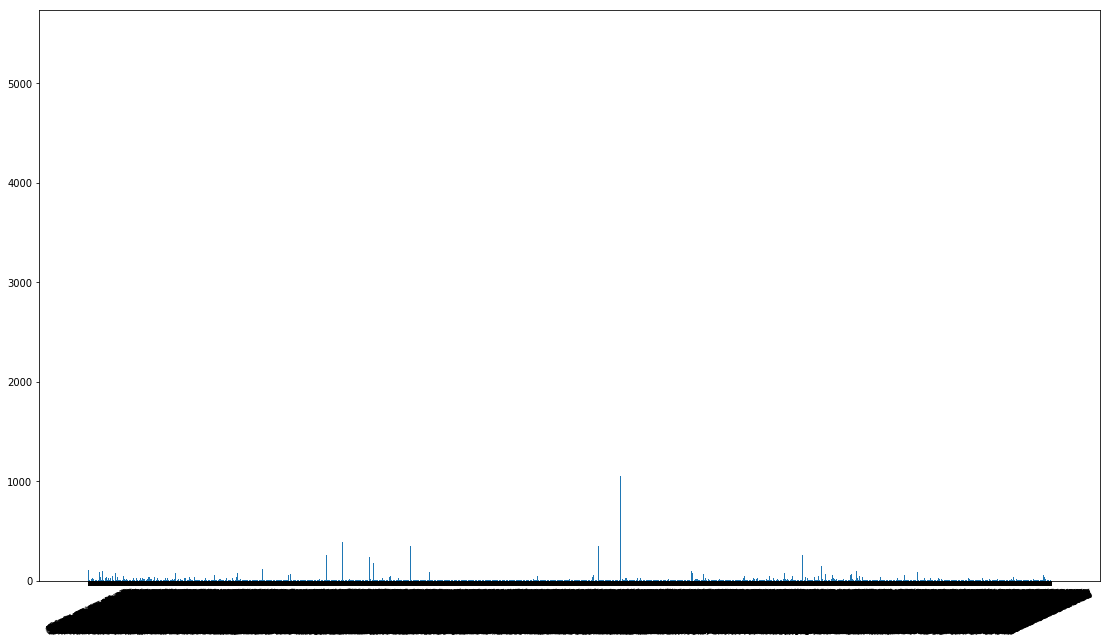

In [122]:
plt.bar(range(len(macDictionary)), macDictionary.values(), align='center')
fig = plt.gcf()
fig.set_size_inches(19, 10.5)
plt.xticks(range(len(macDictionary)), macDictionary.keys(), rotation=25)

In [117]:
# Known MACs occurrence
print(len(macDictionary))
print(macDictionary['00:9a:cd:bc:ff:e3'])
print(macDictionary['cc:61:e5:18:27:eb'])

9357
974
422


In [121]:
print(np.array(macDictionary))

{'4c:12:65:5c:f5:bd': 64, '58:23:8c:e8:47:53': 131, '5a:23:8c:e8:47:54': 114, '98:97:d1:9b:bd:f8': 162, '00:87:01:75:86:e4': 1, 'd0:6f:82:0d:ca:00': 237, '34:57:60:ec:ae:40': 108, 'e4:a4:71:e5:f2:ef': 277, '00:9a:cd:bc:ff:e3': 974, '80:58:f8:c1:2a:6c': 102, '98:6b:3d:79:e9:b0': 128, '10:c2:5a:50:cb:d1': 130, 'fc:b4:e6:c5:ee:2a': 99, 'fc:52:8d:75:26:62': 2, 'c8:14:51:96:39:fd': 1, 'da:a1:19:96:9d:9a': 1, '34:14:5f:d8:1d:a7': 2, '78:29:ed:6d:3d:a9': 2, '18:01:f1:3b:9f:03': 3, 'f8:84:f2:4d:23:a7': 9, 'cc:61:e5:18:27:eb': 422, 'b0:c2:87:21:bc:6a': 43, 'b2:c2:87:21:bc:6b': 45, '78:71:9c:47:52:b0': 50, 'bc:ca:b5:d2:c7:d0': 101, '84:c9:c6:90:5f:79': 34, 'e0:67:b3:2d:c3:b6': 37, '58:c5:cb:d2:69:27': 2, '10:fe:ed:cf:78:b6': 51, '5c:03:39:b4:43:d2': 8, '54:a6:19:4c:c2:90': 117, 'e0:67:b3:74:cb:f8': 28, '98:6b:3d:07:3d:90': 3, '84:c9:c6:90:ba:a9': 28, 'fc:b4:e6:86:7a:dc': 30, '78:29:ed:50:22:a9': 25, 'bc:ca:b5:39:e7:30': 24, '46:32:c8:5e:95:c5': 19, '44:32:c8:5e:95:c4': 19, 'a0:9d:86:16:76:18': 9

In [130]:
# Known MACs occurrence types
run = 0
Mac1_009acdbcffe3 = {}
Counter_009acdbcffe3 = 0
Mac2_cc61e51827eb = {}
Counter_cc61e51827eb = 0
for entry in wifitm.values:
    sys.stdout.write("\r Iteration " + str(run))
    sys.stdout.flush()
    run = run + 1
    if entry[3] == '00:9a:cd:bc:ff:e3':
        Counter_009acdbcffe3 = Counter_009acdbcffe3 + 1
        if entry[2] not in Mac1_009acdbcffe3:
            Mac1_009acdbcffe3[entry[2]] = 1
        else:
            Mac1_009acdbcffe3[entry[2]] = Mac1_009acdbcffe3[entry[2]] + 1
            
    if entry[3] == 'cc:61:e5:18:27:eb':
        Counter_cc61e51827eb = Counter_cc61e51827eb + 1
        if entry[2] not in Mac2_cc61e51827eb:
            Mac2_cc61e51827eb[entry[2]] = 1
        else:
            Mac2_cc61e51827eb[entry[2]] = Mac2_cc61e51827eb[entry[2]] + 1
            
    
     
       


 Iteration 118419

In [131]:
# HUAWEI with no SIM
print(Mac1_009acdbcffe3)
print(Counter_009acdbcffe3)

{'48': 86, '40': 888}
974


In [132]:
# MOTOROLA with data access
print(Mac2_cc61e51827eb)
print(Counter_cc61e51827eb)

{'48': 307, '88': 8, '40': 107}
422


Los dos telefonos de referencia fueron detectados principalmente por paquetes typo 0x48 y 0x40, y con una ocurrencia promedio de 16 por minuto para el HUAWEI y 8 por minuto para el MOTOROLA. A partir de estos indicadores, los paquetes antes mensionados son los seleccionados para el siguiente experimento. Ademas el ciclo de muestreo se establece inicialmente de 5 minutos.

In [133]:
# Wifi frame type counter
run = 0
Mac_types = {}

for entry in wifitm.values:
    sys.stdout.write("\r Iteration " + str(run))
    sys.stdout.flush()
    run = run + 1
    if entry[2] not in Mac_types:
            Mac_types[entry[2]] = 1
    else:
        Mac_types[entry[2]] = Mac_types[entry[2]] + 1
            
    

 Iteration 117700

In [134]:
print(Mac_types)

{'80': 39190, '88': 19932, '48': 5243, 'c8': 2782, '08': 3359, '50': 24503, 'd0': 1248, '40': 20074, 'b0': 377, '00': 90, '10': 157, '30': 5, 'c0': 128, 'a0': 1328, 'a8': 2, 'f0': 1, '20': 1}


([<matplotlib.axis.XTick at 0x1cba5499748>,
 <a list of 17 Text xticklabel objects>)

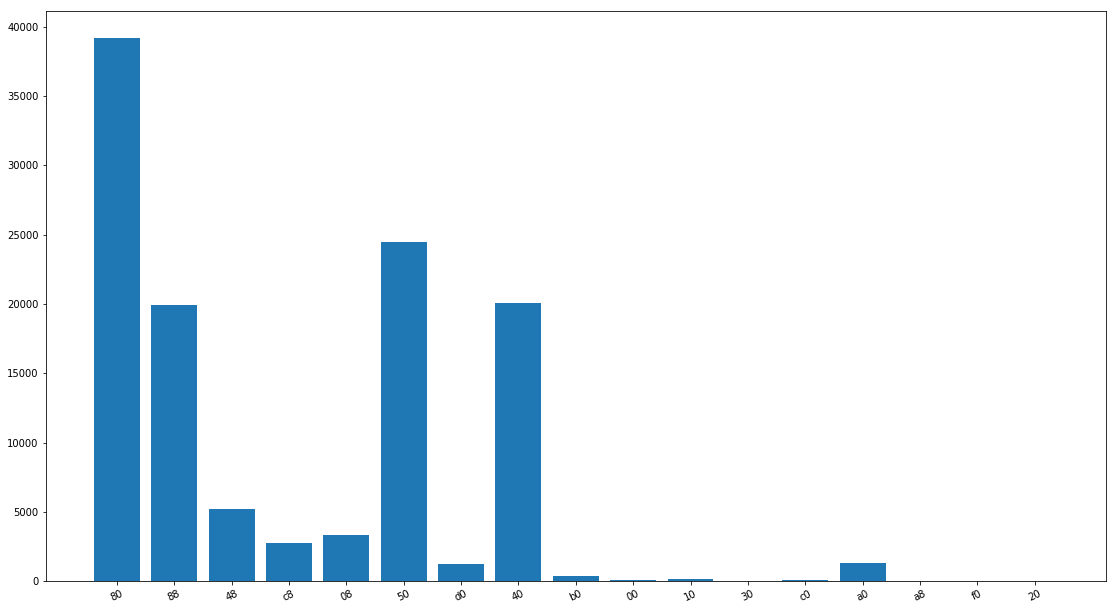

In [135]:
plt.bar(range(len(Mac_types)), Mac_types.values(), align='center')
fig = plt.gcf()
fig.set_size_inches(19, 10.5)
plt.xticks(range(len(Mac_types)), Mac_types.keys(), rotation=25)

# Lists

[  1.28564869  99.01281326  99.01281326  99.01281326  99.01281326
 121.12734914  23.91790366   7.69673109   7.45232783   4.29298871
   4.26595208   2.99586492]
[  7.27272727 242.90909091 242.90909091 242.90909091 242.90909091
  88.27272727  26.45454545  15.81818182  12.90909091   8.54545455
   5.72727273   3.54545455]


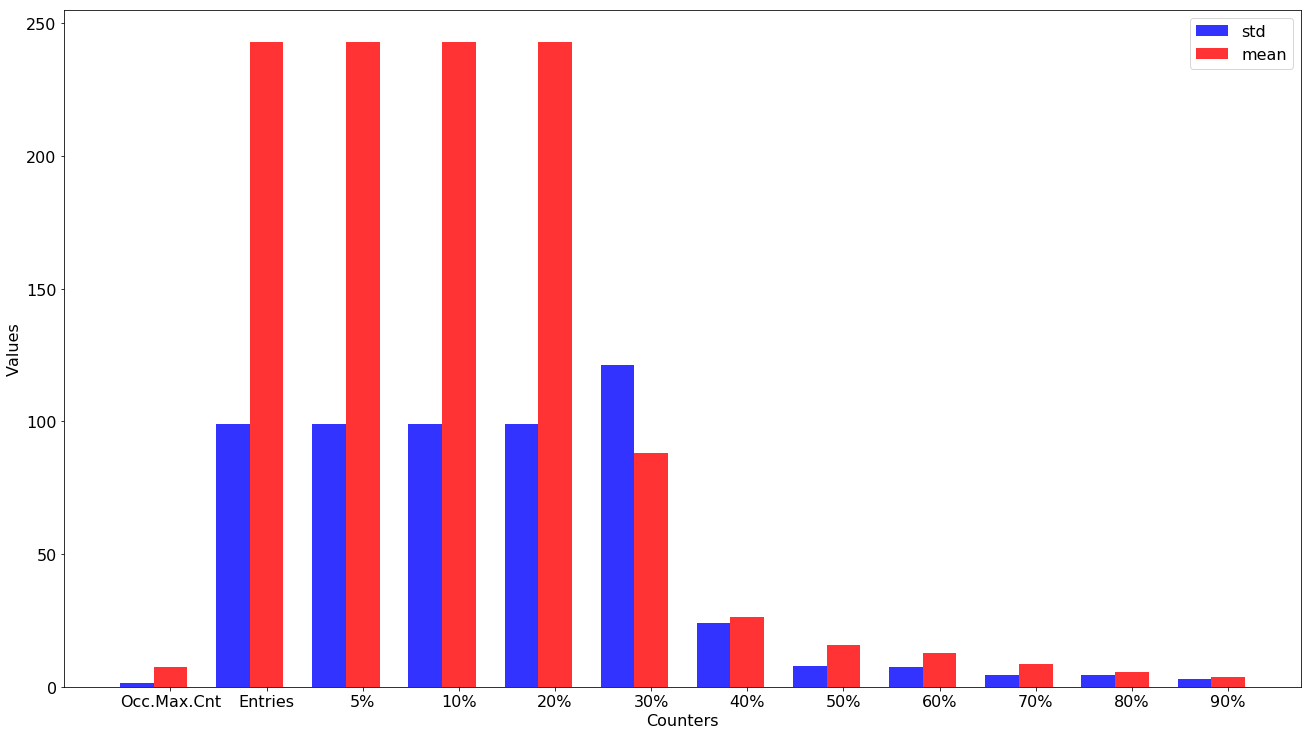

In [55]:
# wifitm = pd.read_csv("tm4wroom.log") 
# wifitm = pd.read_csv("Spark15wroomMay30.log") 
# wifitm = pd.read_csv("Sitp16wroomMay30.log")
wifitm = pd.read_csv("Tm17wroomMay30.log")


# wifitm = pd.read_csv("Sitp4wroom.log")

wifitmVal = wifitm.values
Xaxes = np.arange(wifitmVal.shape[0])
StdVal = np.std(wifitmVal, axis=0)
meanVal = np.mean(wifitmVal, axis=0)
print(StdVal[1:])
print(meanVal[1:])

fig, ax = plt.subplots()
index = np.arange(StdVal[1:].shape[0])
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, StdVal[1:], bar_width,
alpha=opacity,
color='b',
label='std')

rects2 = plt.bar(index + bar_width, meanVal[1:], bar_width,
alpha=opacity,
color='r',
label='mean')

# plt.bar(range(StdVal[1:].shape[0]), StdVal[1:], align='center')
# plt.bar(range(meanVal[1:].shape[0]), meanVal[1:], align='center')
# fig = plt.gcf()

plt.xlabel('Counters')
plt.ylabel('Values')
# plt.title('Scores by person')
plt.xticks(index + bar_width, ('Occ.Max.Cnt', 'Entries', '5%', '10%', '20%', '30%', '40%', '50%','60%','70%','80%','90%'))
plt.legend()

plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)


plt.tight_layout()
plt.show()


    

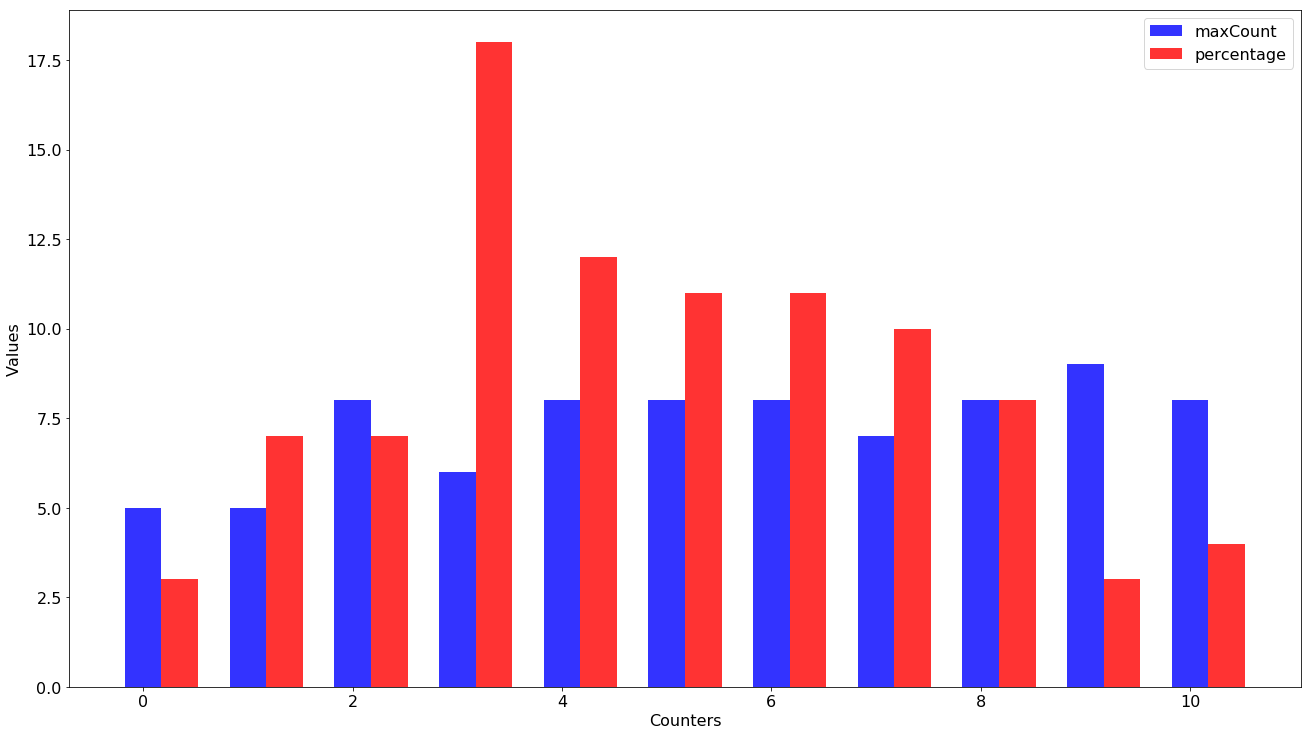

In [44]:
# data to plot
p5 = 3
p10 = 4
p20 = 5
p30 = 6
p40 = 7
p50 = 8
p60 = 9
p70 = 10
p80 = 11
p90 = 12

n_groups = 4
maxCount = wifitmVal[:,1]
entryCount = wifitmVal[:,2]
entryCountPrg = wifitmVal[:,p70]

# create plot


fig, ax = plt.subplots()
index = np.arange(maxCount.shape[0])
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, maxCount, bar_width,
alpha=opacity,
color='b',
label='maxCount')

#rects2 = plt.bar(index + bar_width, entryCount, bar_width,
#alpha=opacity,
#color='g',
#label='entryCount')

rects3 = plt.bar(index + bar_width, entryCountPrg, bar_width,
alpha=opacity,
color='r',
label='percentage')


plt.xlabel('Counters')
plt.ylabel('Values')
# plt.title('Scores by person')
# plt.xticks(index + bar_width, ('A', 'B', 'C', 'D'))
plt.legend()

plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)


plt.tight_layout()
plt.show()

# 5" paket 40 population

## Paket representation

In [205]:

# wifitm = pd.read_csv("tm9wroom.log") 
# wifitm = pd.read_csv("Sitp4wroom.log")
wifitm = pd.read_csv("Sitp10wroomMay14.log")
# wifitm = pd.read_csv("Sitp11wroomMay14.log")


wifitmVal = wifitm.values
Xaxes = np.arange(wifitmVal.shape[0])
print(wifitmVal.shape)

(32227, 4)


In [219]:
# given an time interval , is retunrs row index pair groupes
def findMinutesSubGroupes(frameMatrix, minInterval):
    TIME_DIFF_mS = minInterval
    groupsIdxLst = []
    refTstm = frameMatrix[0][0]
    refIndex = 0
    iterationIdx = 0
    for entry in frameMatrix:
        if entry[0] - refTstm >= TIME_DIFF_mS:
            groupsIdxLst.append([refIndex,iterationIdx])
            refTstm = entry[0]
            refIndex = iterationIdx + 1
            
        iterationIdx = iterationIdx + 1
    
    groupsIdxLst.append([refIndex,iterationIdx - 1])   
        
    return groupsIdxLst
        
        
        
#Return a dictionary with the occurrence frecuency of each packet type#
def pakeTypeScan(frameMatrix):
    # Wifi frame type counter
    run = 0
    Mac_types = {}
    for entry in frameMatrix:
        #sys.stdout.write("\r Iteration " + str(run))
        #sys.stdout.flush()
        run = run + 1
        if entry[2] not in Mac_types:
            Mac_types[entry[2]] = 1
        else:
            Mac_types[entry[2]] = Mac_types[entry[2]] + 1
            
    # sumatory = sum(Mac_types.values())
    # for k in Mac_types:
    #     Mac_types[k] = (Mac_types[k]/sumatory)*100
        
    return Mac_types


def pakeUniqueMacTypeScan(frameMatrix):
    run = 0
    Mac_types = {}
    for entry in frameMatrix:
        #sys.stdout.write("\r Iteration " + str(run))
        #sys.stdout.flush()
        run = run + 1
        if entry[2] not in Mac_types:
            Mac_types[entry[2]] = {}
            Mac_types[entry[2]][entry[3]] = 1
        else:
            if entry[3] not in Mac_types[entry[2]]:
                Mac_types[entry[2]][entry[3]] = 1
                
    return Mac_types
    
# Return a dictionary with the occurrence 
def macAraiceDetection(frameMatrix):
    newMacDetect = np.zeros((3, frameMatrix.shape[0]))
    newMacDetect[2] = frameMatrix[:,0]
    macDictionary = {}
    run = 0
    indexer = 0
    total = 0
    for entry in frameMatrix:
        sys.stdout.write("\r Iteration " + str(run))
        sys.stdout.flush()
        run = run + 1
        if entry[3] not in macDictionary:
            macDictionary[entry[3]] = 1
            newMacDetect[1][indexer] = 1
            total = total + 1
            
            
        newMacDetect[0][indexer] = total
        indexer = indexer + 1
    
    return newMacDetect


def macLiveTime(frameMatrix):
    macDictionary = {}
    run = 0
    indexer = 0
    total = 0
    for entry in frameMatrix:
        sys.stdout.write("\r Iteration " + str(run))
        sys.stdout.flush()
        run = run + 1
        if entry[3] not in macDictionary:
            macDictionary[entry[3]] = {'ini':entry[0],'end':entry[0],'diff':0}
        else:
            macDictionary[entry[3]]['end']= entry[0]
            macDictionary[entry[3]]['diff']= macDictionary[entry[3]]['end'] - macDictionary[entry[3]]['ini']
    
    return  macDictionary       
    
    
def liveTimeFilter(dictionary, timeFilter):
    filterre = []
    for entry in dictionary:
        if dictionary[entry]['diff'] >= timeFilter:
            print(entry + " " + str(dictionary[entry]))
            # print(dictionary[entry])
            filterre.append(dictionary[entry]['diff'])
    
    return filterre

In [196]:

fiveMinutesGroups = findMinutesSubGroupes(wifitmVal,300000)

In [197]:
print(fiveMinutesGroups)

[[0, 7017], [7018, 12520], [12521, 19411], [19412, 26660], [26661, 28986], [28987, 31022], [31023, 33305], [33306, 33933], [33934, 35130], [35131, 35870], [35871, 36668]]


[0, 7017]


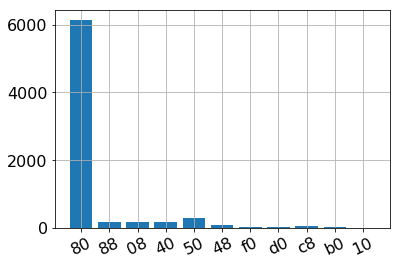

[7018, 12520]


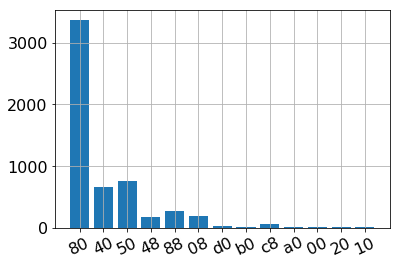

[12521, 19411]


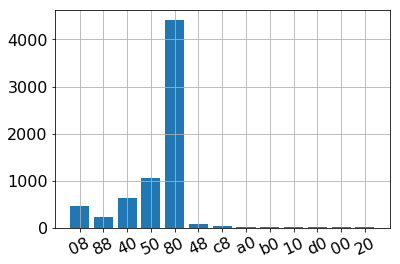

[19412, 26660]


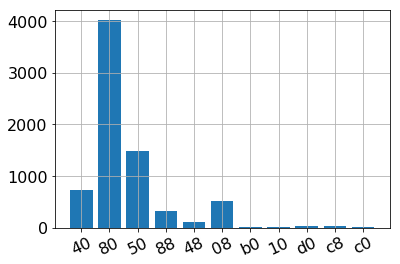

[26661, 28986]


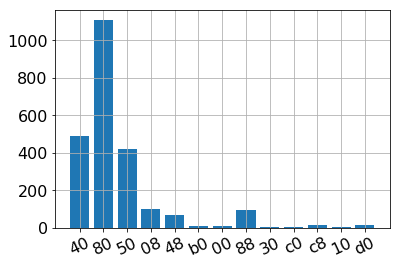

[28987, 31022]


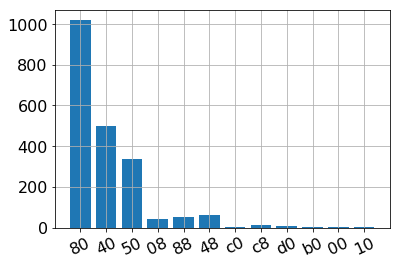

[31023, 33305]


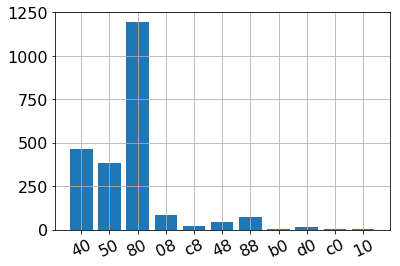

[33306, 33933]


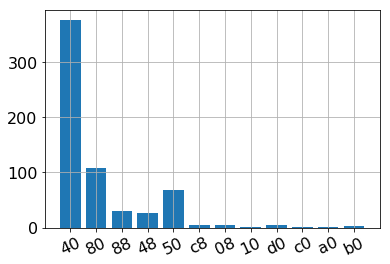

[33934, 35130]


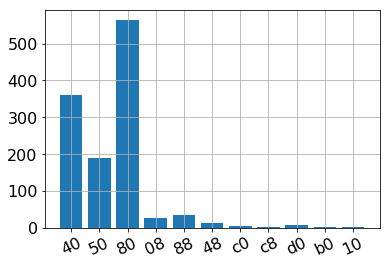

[35131, 35870]


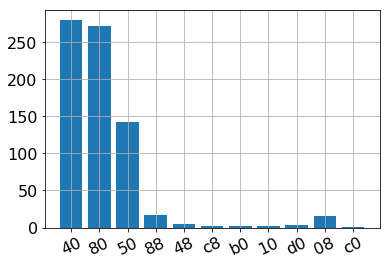

[35871, 36668]


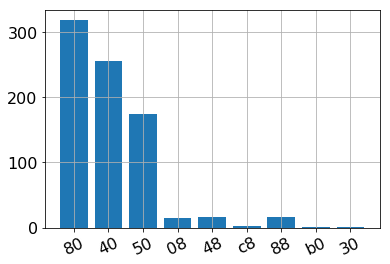

[]


In [192]:
occurrenceList = []
for p in fiveMinutesGroups:
    print(p)
    Mac_types = pakeTypeScan(wifitmVal[p[0]:p[1]+1])
    plt.bar(range(len(Mac_types)), Mac_types.values(), align='center')
    
    fig = plt.gcf()
    # fig.set_size_inches(19, 10.5)
    plt.xticks(range(len(Mac_types)), Mac_types.keys(), rotation=25)
    
    plt.grid()
    plt.show()

print(occurrenceList)

# Unique MAC packet 40 occurrence 

[82, 485, 411, 435, 306, 286, 263, 216, 206, 178, 158]
[381, 1086, 1317, 1301, 695, 486, 638, 117, 273, 189, 245]


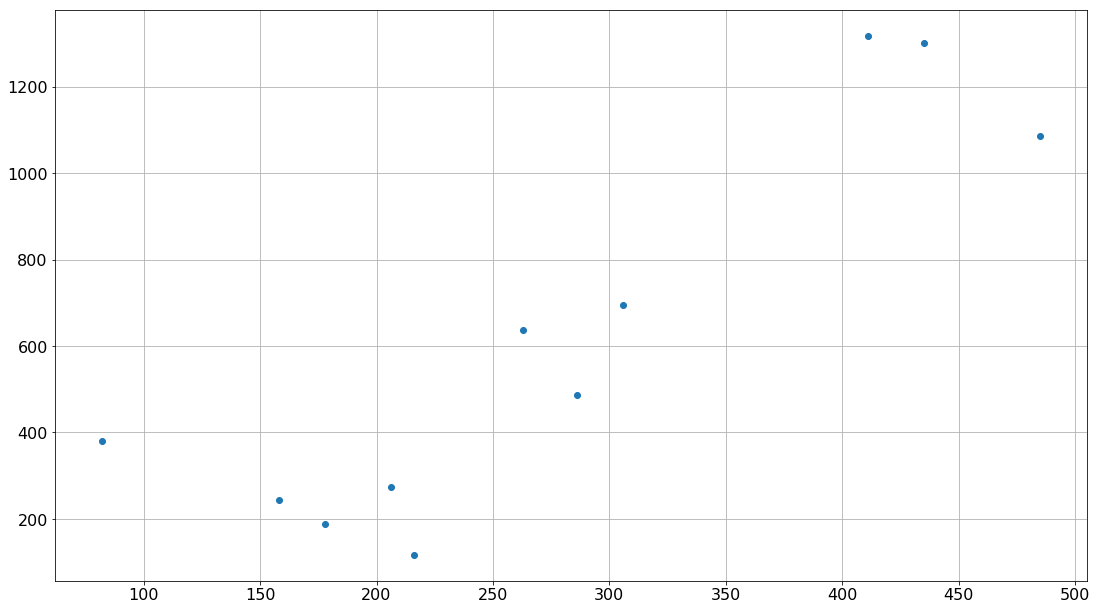

In [193]:
fortyPacjetArr = []
otherPacjetArr = []
for p in fiveMinutesGroups:
    Mac_types = pakeUniqueMacTypeScan(wifitmVal[p[0]:p[1]+1])
    forty = 0
    other = 0
    for entry in Mac_types:
        if entry == '40':
            forty = forty + len(Mac_types[entry])
        else:
            other = other + len(Mac_types[entry])
            
    fortyPacjetArr.append(forty)
    otherPacjetArr.append(other)
    
 

print(fortyPacjetArr)
print(otherPacjetArr)

plt.scatter(fortyPacjetArr, otherPacjetArr)
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
plt.grid()
fig.set_size_inches(18.5, 10.5)
plt.show()

# New MAC Detection

In [206]:
newMacDetect = np.zeros((3, wifitmVal.shape[0]))
newMacDetect[2] = wifitmVal[:,0]
print(newMacDetect)

[[      0.       0.       0. ...       0.       0.       0.]
 [      0.       0.       0. ...       0.       0.       0.]
 [   6134.    6155.    6182. ... 2697503. 2697510. 2697514.]]


In [207]:
newMacDetect = macAraiceDetection(wifitmVal)

 Iteration 31424

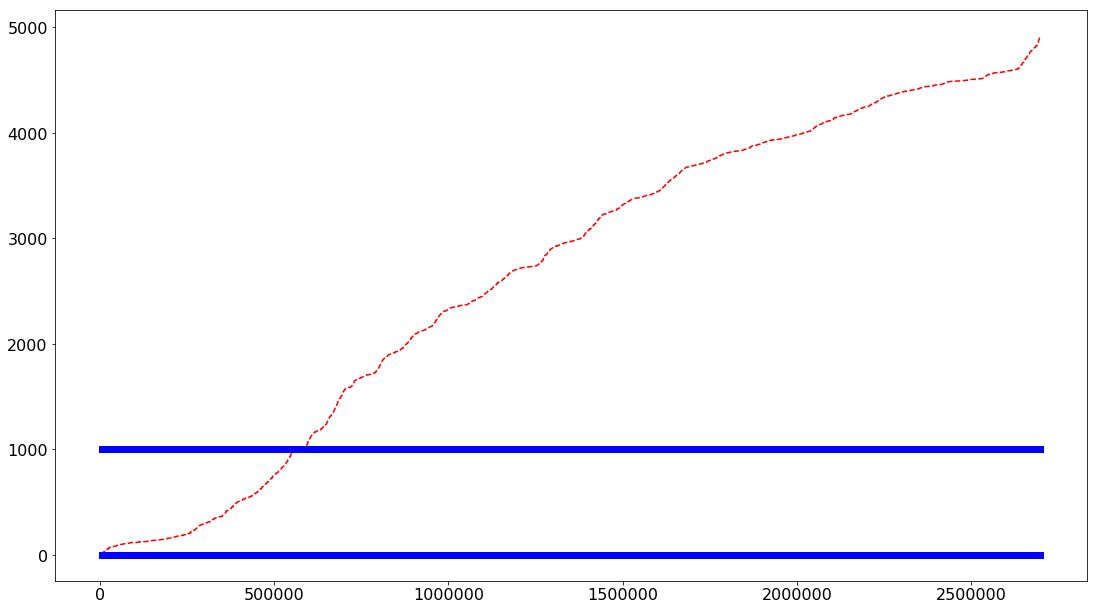

In [208]:

plt.plot(newMacDetect[2], newMacDetect[0], 'r--', newMacDetect[2], newMacDetect[1]*1000, 'bs',)
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
# plt.xlim(1000000,1200000)
plt.show()

In [209]:
macLiveTimeDat = macLiveTime(wifitmVal)

 Iteration 32226

In [210]:
print(macLiveTimeDat)

tlArr = np.zeros((len(macLiveTimeDat)))
indexer = 0
for k in macLiveTimeDat:
    tlArr[indexer] = macLiveTimeDat[k]['diff']
    indexer = indexer + 1
                                
    

print(tlArr)

{'b4eeb490eb16': {'ini': 6134, 'end': 293060, 'diff': 286926}, '885dfba18808': {'ini': 6155, 'end': 305572, 'diff': 299417}, '84100d9db237': {'ini': 6182, 'end': 6865, 'diff': 683}, 'daa1198d2945': {'ini': 6272, 'end': 6272, 'diff': 0}, 'e069954e7a69': {'ini': 6314, 'end': 293001, 'diff': 286687}, 'c4a366fd5998': {'ini': 6430, 'end': 280046, 'diff': 273616}, '20689db6ec2b': {'ini': 6791, 'end': 227314, 'diff': 220523}, 'dc028ef63a98': {'ini': 7195, 'end': 293608, 'diff': 286413}, '168811c35019': {'ini': 7876, 'end': 128107, 'diff': 120231}, 'e069951711dc': {'ini': 8201, 'end': 307866, 'diff': 299665}, '80c6abc53698': {'ini': 9192, 'end': 243889, 'diff': 234697}, '14cc2037940b': {'ini': 9302, 'end': 309132, 'diff': 299830}, '94877c63d8f0': {'ini': 10143, 'end': 192306, 'diff': 182163}, '74a78ee40c1c': {'ini': 10513, 'end': 309930, 'diff': 299417}, '24f27f837e01': {'ini': 11128, 'end': 284843, 'diff': 273715}, '24f27f837e02': {'ini': 11129, 'end': 284843, 'diff': 273714}, '24f27f837e03':

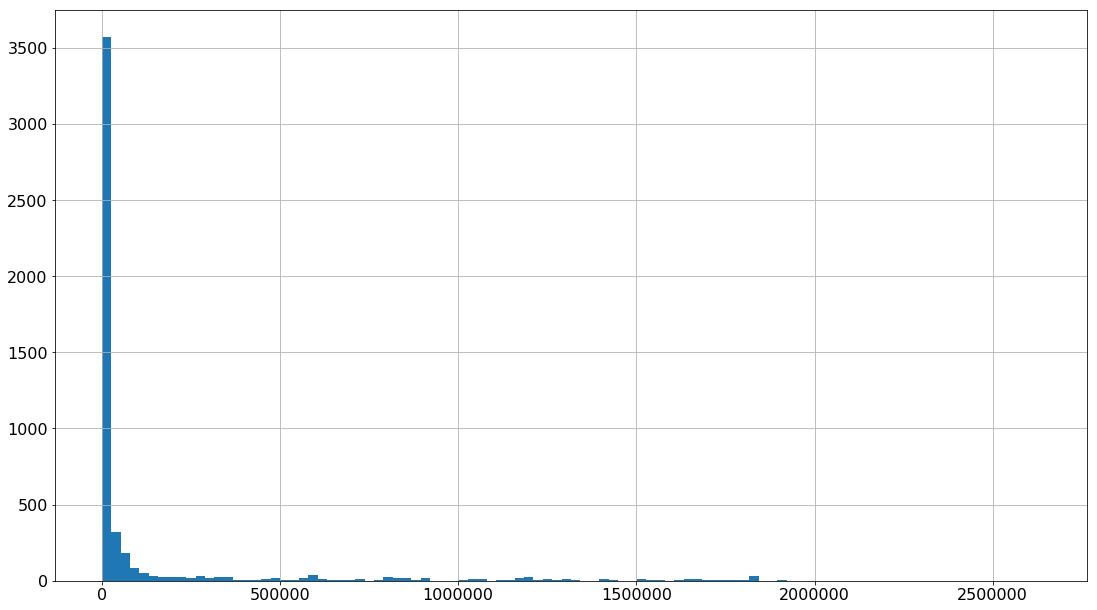

In [211]:
# the histogram of the data
# plt.hist(x, normed=True, bins=30)
# n, bins, patches = plt.hist(tlArr, 50, density=True, facecolor='g', alpha=0.75)
fig, ax = plt.subplots()
plt.grid(True)
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
ax.hist(tlArr, bins=100)
plt.show()

603d26bd585a {'ini': 11140, 'end': 323462, 'diff': 312322}
58238cc739dd {'ini': 11208, 'end': 323935, 'diff': 312727}
30b5c2972af8 {'ini': 11302, 'end': 337033, 'diff': 325731}
9897d16fed60 {'ini': 11325, 'end': 323436, 'diff': 312111}
603d266eae63 {'ini': 14171, 'end': 326391, 'diff': 312220}
4632c87f4fed {'ini': 14284, 'end': 561101, 'diff': 546817}
8e04ffe80300 {'ini': 14392, 'end': 326200, 'diff': 311808}
bc8556c32b6e {'ini': 14395, 'end': 340026, 'diff': 325631}
8c04ff764db5 {'ini': 14529, 'end': 339343, 'diff': 324814}
4432c87f4fec {'ini': 14795, 'end': 561099, 'diff': 546304}
18d6c76d350f {'ini': 16177, 'end': 328599, 'diff': 312422}
0019be0011b8 {'ini': 31145, 'end': 512678, 'diff': 481533}
0619be0011b8 {'ini': 31529, 'end': 499546, 'diff': 468017}
e4a471e5f2ef {'ini': 48086, 'end': 2681321, 'diff': 2633235}
d0608cfaaa1e {'ini': 58189, 'end': 578378, 'diff': 520189}
08952a4d343c {'ini': 144207, 'end': 495453, 'diff': 351246}
e2885dd988dd {'ini': 144446, 'end': 561113, 'diff': 4

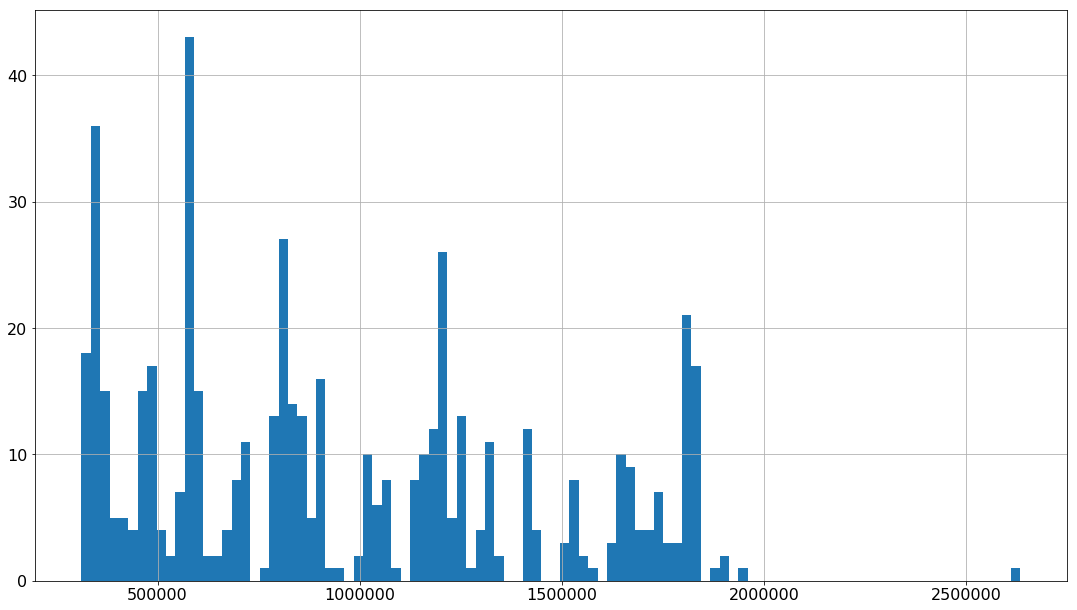

In [220]:
filtered = liveTimeFilter(macLiveTimeDat,300000)
fig, ax = plt.subplots()
plt.grid(True)
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
ax.hist(filtered, bins=100)
plt.show()

# Trip Function Set

In [65]:
def tripReportStatistics(reportFile):
    
    wifitm = pd.read_csv(reportFile)
    wifitmVal = wifitm.values
    Xaxes = np.arange(wifitmVal.shape[0])
    StdVal = np.std(wifitmVal, axis=0)
    meanVal = np.mean(wifitmVal, axis=0)
    # print(StdVal[1:])
    # print(meanVal[1:])

    fig, ax = plt.subplots()
    index = np.arange(StdVal[1:].shape[0])
    bar_width = 0.35
    opacity = 0.8

    rects1 = plt.bar(index, StdVal[1:], bar_width,
    alpha=opacity,
    color='b',
    label='std')

    rects2 = plt.bar(index + bar_width, meanVal[1:], bar_width,
    alpha=opacity,
    color='r',
    label='mean')



    plt.xlabel('Counters')
    plt.ylabel('Values')
    # plt.title('Scores by person')
    plt.xticks(index + bar_width, ('Occ.Max.Cnt', 'Entries', '5%', '10%', '20%', '30%', '40%', '50%','60%','70%','80%','90%'))
    plt.legend()

    plt.rcParams.update({'font.size': 16})
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)


    plt.tight_layout()
    plt.show()
    
    
def tripReportPercentageDescription(reportFile, countPercentage):
    # data to plot
    thisdict ={
         "p5": 3,
         "p10": 4,
         "p20": 5,
         "p30": 6,
         "p40": 7,
         "p50": 8,
         "p60": 9,
         "p70": 10,
         "p80": 11,
         "p90": 12
    }
    p5 = 3
    p10 = 4
    p20 = 5
    p30 = 6
    p40 = 7
    p50 = 8
    p60 = 9
    p70 = 10
    p80 = 11
    p90 = 12
    percentage = thisdict[countPercentage]
    wifitm = pd.read_csv(reportFile)
    wifitmVal = wifitm.values
    n_groups = 4
    maxCount = wifitmVal[:,1]
    entryCount = wifitmVal[:,2]
    entryCountPrg = wifitmVal[:,percentage]

    # create plot


    fig, ax = plt.subplots()
    index = np.arange(maxCount.shape[0])
    bar_width = 0.35
    opacity = 0.8

    rects1 = plt.bar(index, maxCount, bar_width,
    alpha=opacity,
    color='b',
    label='maxCount')

    #rects2 = plt.bar(index + bar_width, entryCount, bar_width,
    #alpha=opacity,
    #color='g',
    #label='entryCount')

    rects3 = plt.bar(index + bar_width, entryCountPrg, bar_width,
    alpha=opacity,
    color='r',
    label='percentage')


    plt.xlabel('Counters')
    plt.ylabel('Values')
    # plt.title('Scores by person')
    # plt.xticks(index + bar_width, ('A', 'B', 'C', 'D'))
    plt.legend()

    plt.rcParams.update({'font.size': 16})
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)


    plt.tight_layout()
    plt.show()

## C code implementation. No executable 


This code was compiled using arduino IDE, along with ESP32 Dev Module library framework.

```C++
#include <Arduino.h>

#include "FS.h"
#include "SD.h"
#include "SPI.h"


#include "freertos/FreeRTOS.h"
#include "esp_wifi.h"
#include "esp_wifi_types.h"
#include "esp_system.h"
#include "esp_event.h"
#include "esp_event_loop.h"
#include "nvs_flash.h"
#include "driver/gpio.h"


#define LED_GPIO_PIN                     5
#define WIFI_CHANNEL_SWITCH_INTERVAL  (500)
#define WIFI_CHANNEL_MAX              (13)
#define MAC_LIST_SIZE                 (512)
#define MAC_SIZE                      (14)
#define MACRAW_LIST_FILTER_SIZE       (5)
#define REPORT_TIME_mS                (300000)
#define ANTI_BUSRT_DELAY_mS           (30000)
#define SERIAL_BAUD                   (115200)
uint8_t level = 0, channel = 1;

// MAC tracking structure
typedef struct {
  uint16_t ui16OccCtr;
  char cStrMac[14];
  // int32_t rssi;
  unsigned long antiBusrtTime;
} MACTRACKING_t,*PMACTRACKING_t,**P_PMACTRACKING_t;

typedef struct {
  uint8_t ui8PkType;
  char cStrMac[14];
} MACRAW_t,*PMACRAW_t,**P_PMACRAW_t;

typedef struct {
  uint8_t ui8_index;          //next free index
  uint8_t ui8_size;           //mac tracking list size
  PMACRAW_t mac4fltrlist;     //mac for filtering list
  
} MACRAW_FILTER_LIST_t,*PMACRAW_FILTER_LIST_t,**P_PMACRAW_FILTER_LIST_t;

typedef struct {
  uint16_t ui16_index;        //next free index
  uint16_t ui16_size;         //mac tracking list size
  PMACTRACKING_t maclist;     //mac tracking list
  unsigned long StartTime;    //mac tracking start time in mS
  unsigned long ElapsedTime;  //mac tracking elapsed time in mS
  // unsigned long MaxUpdateTime;//Max. mac tracking list update time
  unsigned long ReportTime;
  uint16_t MaxCounter;
} MACTRACKING_LIST_t,*PMACTRACKING_LIST_t,**P_PMACTRACKING_LIST_t;


// static wifi_country_t wifi_country = WIFI_COUNTRY_EU;
typedef struct {
  unsigned frame_ctrl:16;
  unsigned duration_id:16;
  uint8_t addr1[6]; /* receiver address */
  uint8_t addr2[6]; /* sender address */
  uint8_t addr3[6]; /* filtering address */
  unsigned sequence_ctrl:16;
  uint8_t addr4[6]; /* optional */
} wifi_ieee80211_mac_hdr_t;

typedef struct {
  wifi_ieee80211_mac_hdr_t hdr;
  uint8_t payload[0]; /* network data ended with 4 bytes csum (CRC32) */
} wifi_ieee80211_packet_t;

static esp_err_t event_handler(void *ctx, system_event_t *event);
static void wifi_sniffer_init(void);
static void wifi_sniffer_set_channel(uint8_t channel);
static const char *wifi_sniffer_packet_type2str(wifi_promiscuous_pkt_type_t type);
static void wifi_sniffer_packet_handler(void *buff, wifi_promiscuous_pkt_type_t type);


/*MAC list*/

static MACTRACKING_t sa_MacList[MAC_LIST_SIZE];
static MACTRACKING_LIST_t sa_MacListObj = {.ui16_index = 0 ,
                                            .ui16_size = MAC_LIST_SIZE,
                                            .maclist = sa_MacList,
                                            .StartTime =  millis(),
                                            .ElapsedTime = 0,
                                            // .MaxUpdateTime = 0,
                                            .ReportTime = REPORT_TIME_mS,
                                            .MaxCounter = 0};
/*Structurues for raw MAC printing and burst filtering*/
static MACRAW_t sa_MacList4Filtering[MACRAW_LIST_FILTER_SIZE];
static MACRAW_FILTER_LIST_t sa_MacLis4FilttObj = {.ui8_index = 0,
                                                  .ui8_size = MACRAW_LIST_FILTER_SIZE,
                                                  .mac4fltrlist = sa_MacList4Filtering};
 
static void mactrack_ListInit(PMACTRACKING_LIST_t sa_MacListObj);
static void mactrack_ListUpdate(PMACTRACKING_LIST_t sa_MacListObj, char * mac, int32_t rssi);
static void mactrack_Timing(PMACTRACKING_LIST_t sa_MacListObj);
static void mactrack_Report(PMACTRACKING_LIST_t sa_MacListObj);
static void mactrack_Print(PMACTRACKING_LIST_t sa_MacListObj);
static void mactrack_BuildReport(PMACTRACKING_LIST_t sa_MacListObj);

static void macrawtrack4Filter_ListInit(PMACRAW_FILTER_LIST_t sa_MacLis4FilttObj);
static uint8_t macrawtrack4Filter_PrintTriger(PMACRAW_FILTER_LIST_t sa_MacLis4FilttObj, char * mac, uint8_t ui8PckType);

esp_err_t event_handler(void *ctx, system_event_t *event)
{
  return ESP_OK;
}

void wifi_sniffer_init(void)
{
  nvs_flash_init();
  tcpip_adapter_init();
  ESP_ERROR_CHECK( esp_event_loop_init(event_handler, NULL) );
  wifi_init_config_t cfg = WIFI_INIT_CONFIG_DEFAULT();
  ESP_ERROR_CHECK( esp_wifi_init(&cfg) );
  //ESP_ERROR_CHECK( esp_wifi_set_country(wifi_country) ); /* set country for channel range [1, 13] */
  ESP_ERROR_CHECK( esp_wifi_set_storage(WIFI_STORAGE_RAM) );
  ESP_ERROR_CHECK( esp_wifi_set_mode(WIFI_MODE_AP) );
  ESP_ERROR_CHECK( esp_wifi_start() );
  esp_wifi_set_promiscuous(true);
  esp_wifi_set_promiscuous_rx_cb(&wifi_sniffer_packet_handler);
  wifi_second_chan_t secondCh = (wifi_second_chan_t)NULL;
   esp_wifi_set_channel(1,secondCh);
}

void wifi_sniffer_set_channel(uint8_t channel)
{
  esp_wifi_set_channel(channel, WIFI_SECOND_CHAN_NONE);
}

const char * wifi_sniffer_packet_type2str(wifi_promiscuous_pkt_type_t type)
{
  switch(type) {
  case WIFI_PKT_MGMT: return "MGMT";
  case WIFI_PKT_DATA: return "DATA";
  default:  
  case WIFI_PKT_MISC: return "MISC";
  }
}

void wifi_sniffer_packet_handler(void* buff, wifi_promiscuous_pkt_type_t type)
{
  unsigned long timeStamp;
  char cStrMac[MAC_SIZE] = {0,0,0,0,0,0,0,0,0,0,0,0,0,0};
  uint8_t ui8PckType = 0;
  uint8_t ui8TaskCode = 1;
  const wifi_promiscuous_pkt_t *ppkt = (wifi_promiscuous_pkt_t *)buff;
  wifi_pkt_rx_ctrl_t ctrl = (wifi_pkt_rx_ctrl_t)ppkt->rx_ctrl; // ctrl es la estructura del del header wi-fi
  timeStamp = millis();
 
  sprintf(cStrMac, "%02x%02x%02x%02x%02x%02x",  ppkt->payload[10],ppkt->payload[11],ppkt->payload[12],ppkt->payload[13],ppkt->payload[14],ppkt->payload[15]);
  ui8PckType = ppkt->payload[0];
 
  if(ui8TaskCode == 0)
  {
      if (macrawtrack4Filter_PrintTriger(&sa_MacLis4FilttObj, cStrMac, ui8PckType) > 0)
      {
        printf("%lu,%i,%02x,%02x%02x%02x%02x%02x%02x\n",
          timeStamp,
          ctrl.rssi,
          ppkt->payload[0],
          ppkt->payload[10],ppkt->payload[11],ppkt->payload[12],
          ppkt->payload[13],ppkt->payload[14],ppkt->payload[15]
        );
      }
  }else if(ui8TaskCode == 1)
  {
      if(ppkt->payload[0] == 0x40 && ctrl.rssi > -90)
      {
        // printf("Packed detected %02x at %lu %lu \n", ppkt->payload[0],timeStamp, (&sa_MacListObj)->ElapsedTime );
        //sprintf(cStrMac, "%02x%02x%02x%02x%02x%02x",  ppkt->payload[10],ppkt->payload[11],ppkt->payload[12],ppkt->payload[13],ppkt->payload[14],ppkt->payload[15]);
        mactrack_ListUpdate(&sa_MacListObj, cStrMac, ppkt->rx_ctrl.rssi);
      }
      mactrack_Timing(&sa_MacListObj);
      mactrack_Report(&sa_MacListObj);
  }
  
  
  

 
 

}

// the setup function runs once when you press reset or power the board
void setup() {
  // initialize digital pin 5 as an output.
  Serial.begin(SERIAL_BAUD);
  delay(10);
  wifi_sniffer_init();
  pinMode(LED_GPIO_PIN, OUTPUT);
  mactrack_ListInit(&sa_MacListObj);
  macrawtrack4Filter_ListInit(&sa_MacLis4FilttObj);
 
  // printf("Last Mac list mac %d\n",sa_MacListObj).ui16_size);
}
/*
Initilize mac tracker list structure
*/
void mactrack_ListInit(PMACTRACKING_LIST_t sa_MacListObj)
{
  // uint16_t ui16_Idx;
  /*
  for(ui16_Idx = 0; ui16_Idx < sa_MacListObj->ui16_size; ui16_Idx++)
  {
    sa_MacListObj->maclist[ui16_Idx].ui16OccCtr = 0;
    // sa_MacListObj->maclist[ui16_Idx].rssi = 0;
    strcpy(sa_MacListObj->maclist[ui16_Idx].cStrMac,"nil");
  }
  */
  sa_MacListObj->ui16_index = 0;
  sa_MacListObj->StartTime = millis();
  // sa_MacListObj->MaxUpdateTime = 0;
  sa_MacListObj->ElapsedTime = 0;
  sa_MacListObj->MaxCounter = 0;
  // printf("Mac list size %d\n",sa_MacListObj->ui16_size);
  // printf("Mac list index %d\n",sa_MacListObj->ui16_index);
  // printf("First Mac list mac %s\n",sa_MacListObj->maclist[0].cStrMac);
  // printf("Last Mac list mac %s\n",sa_MacListObj->maclist[sa_MacListObj->ui16_size - 1].cStrMac);
 
}


/*
Mac tracking list update
*/
void  mactrack_ListUpdate(PMACTRACKING_LIST_t sa_MacListObj, char * mac, int32_t rssi)
{
  uint16_t ui16_Idx;
  uint8_t ui8_Found;
  uint8_t ui8_MacDiffCounter;
  uint8_t ui8_j;
  
  if(sa_MacListObj->ui16_index == 0)
  {
    strcpy(sa_MacListObj->maclist[0].cStrMac,mac);
    sa_MacListObj->maclist[0].ui16OccCtr = 1;
    sa_MacListObj->maclist[0].antiBusrtTime = millis();
    // sa_MacListObj->maclist[0].rssi = (rssi/3) + (2*sa_MacListObj->maclist[0].rssi)/3;
    sa_MacListObj->ui16_index = 1;
    sa_MacListObj->MaxCounter = 1;
  }
  else
  {
    ui8_Found = 0;
    for(ui16_Idx = 0; ui16_Idx < sa_MacListObj->ui16_index; ui16_Idx++)
    {
      ui8_MacDiffCounter = 0;
      /*MAC diff stimation*/
      for(ui8_j = 0;ui8_j < MAC_SIZE;ui8_j++)
      {
        if(sa_MacListObj->maclist[ui16_Idx].cStrMac[ui8_j] != mac[ui8_j])
        {
          ui8_MacDiffCounter = ui8_MacDiffCounter + 1;
        }
      }
      /*When MAC different octetos gets lower than 4, it is cosidered the same*/
      if(ui8_MacDiffCounter < 4)
      {
         /*Mac is already present on current list*/
        if((millis() - sa_MacListObj->maclist[ui16_Idx].antiBusrtTime) >= ANTI_BUSRT_DELAY_mS)
        {
          /*Apply antiburst delay. Increment occurrence counter
          and updata antiburst delay*/
          sa_MacListObj->maclist[ui16_Idx].ui16OccCtr++;
          
          // Update Max counter
          if(sa_MacListObj->maclist[ui16_Idx].ui16OccCtr > sa_MacListObj->MaxCounter)
          {
            sa_MacListObj->MaxCounter = sa_MacListObj->maclist[ui16_Idx].ui16OccCtr;
          }

          sa_MacListObj->maclist[ui16_Idx].antiBusrtTime = millis();
        }
        
        
        // sa_MacListObj->maclist[ui16_Idx].rssi = (rssi/3) + (2*sa_MacListObj->maclist[ui16_Idx].rssi)/3;
        ui8_Found = 1;
        
        break;
      }
    }
    /*Mac is not present on current list*/
    if(ui8_Found == 0)
    {
      if(sa_MacListObj->ui16_index < sa_MacListObj->ui16_size)
      {
        strcpy(sa_MacListObj->maclist[sa_MacListObj->ui16_index].cStrMac,mac);
        sa_MacListObj->maclist[sa_MacListObj->ui16_index].ui16OccCtr = 1;
        sa_MacListObj->maclist[sa_MacListObj->ui16_index].antiBusrtTime = millis();
        // sa_MacListObj->maclist[ui16_Idx].rssi = (rssi/3) + (2*sa_MacListObj->maclist[ui16_Idx].rssi)/3;
        sa_MacListObj->ui16_index++;
      }
      /*else new entry but no room*/
    }
  }
 
}
/*Update mac tracking elapsed time*/
void mactrack_Timing(PMACTRACKING_LIST_t sa_MacListObj)
{
  unsigned long ul_CurrentTime;
  /*update elampsed time*/
  ul_CurrentTime = millis();
  sa_MacListObj->ElapsedTime = ul_CurrentTime - sa_MacListObj->StartTime;
  //printf("Elapsed time mS %lu\n", sa_MacListObj->ElapsedTime);
}
/*Print mac tracking report*/
 void mactrack_Report(PMACTRACKING_LIST_t sa_MacListObj)
 {
  
   if(sa_MacListObj->ElapsedTime >= sa_MacListObj->ReportTime)
   {
      // mactrack_Print(sa_MacListObj);
      mactrack_BuildReport(sa_MacListObj);
      mactrack_ListInit(sa_MacListObj); 
   } 
 }
/*Pint mac tracking list*/
void mactrack_Print(PMACTRACKING_LIST_t sa_MacListObj)
{
  uint8_t ui16_Idx;
  
  printf("Elapsed time %lu\n",sa_MacListObj->ElapsedTime);
  printf("Max Counter %u\n", sa_MacListObj->MaxCounter);
  printf("Entries %i\n", sa_MacListObj->ui16_index);
  for(ui16_Idx = 0; ui16_Idx < sa_MacListObj->ui16_index; ui16_Idx++)
    {
      printf("%s %u\n",sa_MacListObj->maclist[ui16_Idx].cStrMac,
                          sa_MacListObj->maclist[ui16_Idx].ui16OccCtr);
    }

  
}
/*Build MAc occurrence report*/
static void mactrack_BuildReport(PMACTRACKING_LIST_t sa_MacListObj)
{
  uint16_t ui16_Idx;
  uint8_t ui8_Jdx;
  unsigned long ulReportmS = millis();
  uint16_t percentagesArr[] = {(uint16_t)(sa_MacListObj->MaxCounter*0.05),
                                (uint16_t)(sa_MacListObj->MaxCounter*0.1),
                                (uint16_t)(sa_MacListObj->MaxCounter*0.2),
                                (uint16_t)(sa_MacListObj->MaxCounter*0.3),
                                (uint16_t)(sa_MacListObj->MaxCounter*0.4),
                                (uint16_t)(sa_MacListObj->MaxCounter*0.5),
                                (uint16_t)(sa_MacListObj->MaxCounter*0.6),
                                (uint16_t)(sa_MacListObj->MaxCounter*0.7),
                                (uint16_t)(sa_MacListObj->MaxCounter*0.8),
                                (uint16_t)(sa_MacListObj->MaxCounter*0.9)};
  uint16_t percentagesCtrArr[] = {0,0,0,0,0,0,0,0,0,0};               
  if(sa_MacListObj->ui16_index > 0)
  {
      for(ui16_Idx = 0; ui16_Idx < sa_MacListObj->ui16_index; ui16_Idx++)
      {
        for(ui8_Jdx = 0; ui8_Jdx < 10; ui8_Jdx++)
        {
          if(sa_MacListObj->maclist[ui16_Idx].ui16OccCtr >= percentagesArr[ui8_Jdx])
          {
             percentagesCtrArr[ui8_Jdx] = percentagesCtrArr[ui8_Jdx] + 1;
          }
          else{
            break;
          }
        }
      }
  }
  printf("%lu,%u,%i,%u,%u,%u,%u,%u,%u,%u,%u,%u,%u\n",ulReportmS,
                                              sa_MacListObj->MaxCounter,
                                              sa_MacListObj->ui16_index,
                                              percentagesCtrArr[0],
                                              percentagesCtrArr[1],
                                              percentagesCtrArr[2],
                                              percentagesCtrArr[3],
                                              percentagesCtrArr[4],
                                              percentagesCtrArr[5],
                                              percentagesCtrArr[6],
                                              percentagesCtrArr[7],
                                              percentagesCtrArr[8],
                                              percentagesCtrArr[9]);
}

static void macrawtrack4Filter_ListInit(PMACRAW_FILTER_LIST_t sa_MacLis4FilttObj)
{
  sa_MacLis4FilttObj->ui8_index = 0;
  
}

static uint8_t macrawtrack4Filter_PrintTriger(PMACRAW_FILTER_LIST_t sa_MacLis4FilttObj, char * mac, uint8_t ui8PckType)
{
  uint8_t j;
  int8_t rtn = 0;
  uint8_t ui8DiffCtr = MACRAW_LIST_FILTER_SIZE;

  for(j = 0;j < MACRAW_LIST_FILTER_SIZE; j++)
  {
    if((strcmp(mac, sa_MacLis4FilttObj->mac4fltrlist[j].cStrMac) != 0) || (ui8PckType != sa_MacLis4FilttObj->mac4fltrlist[j].ui8PkType))
    {
      ui8DiffCtr--;
    }
  }

  if(ui8DiffCtr == 0)
  {
    strcpy(sa_MacLis4FilttObj->mac4fltrlist[sa_MacLis4FilttObj->ui8_index].cStrMac,mac);
    sa_MacLis4FilttObj->mac4fltrlist[sa_MacLis4FilttObj->ui8_index].ui8PkType = ui8PckType;
    sa_MacLis4FilttObj->ui8_index++;
    if(sa_MacLis4FilttObj->ui8_index >= MACRAW_LIST_FILTER_SIZE)
    {
      sa_MacLis4FilttObj->ui8_index = 0;
    }
    rtn = 1;
  }

  return rtn;
  
}

// the loop function runs over and over again forever
void loop() {
  //Serial.print("inside loop");
  delay(214); // wait for a second
  
  if (digitalRead(LED_GPIO_PIN) == LOW)
    digitalWrite(LED_GPIO_PIN, HIGH);
  else
    digitalWrite(LED_GPIO_PIN, LOW);
  vTaskDelay(WIFI_CHANNEL_SWITCH_INTERVAL / portTICK_PERIOD_MS);
  wifi_sniffer_set_channel(channel);
  channel = (channel % WIFI_CHANNEL_MAX) + 1;
}


```

# C code snippet. Explanation.

## CONSTANTS
`#define LED_GPIO_PIN                     5`  
`#define WIFI_CHANNEL_SWITCH_INTERVAL  (500)`  
switching Time interval for listening WiFi channel.  
`#define WIFI_CHANNEL_MAX              (13)`  
Maximum listening WiFi channel.  
`#define MAC_LIST_SIZE                 (512)`  
Listening MAC structure array size  
`#define MAC_SIZE                      (14)`  
MAC Byte size  
`#define MACRAW_LIST_FILTER_SIZE       (5)`  
Nothing to say  
`#define REPORT_TIME_mS                (300000)`  
MAC counting report interval.  
`#define ANTI_BUSRT_DELAY_mS           (30000)`  
Similar MAC burt filter interval  
`#define SERIAL_BAUD                   (115200)`

## ESP32 Setup
ESP32 is configured as acces point (AP), and promiscuous mode is set to true. Function `wifi_sniffer_packet_handler` is set as packet reception callback.

```C++
// the setup function runs once when you press reset or power the board
void setup() {
  // initialize digital pin 5 as an output.
  Serial.begin(SERIAL_BAUD);
  delay(10);
  wifi_sniffer_init();
  pinMode(LED_GPIO_PIN, OUTPUT);
  mactrack_ListInit(&sa_MacListObj);
  macrawtrack4Filter_ListInit(&sa_MacLis4FilttObj);
 
  // printf("Last Mac list mac %d\n",sa_MacListObj).ui16_size);
}

...
    
void wifi_sniffer_init(void)
{
  nvs_flash_init();
  tcpip_adapter_init();
  ESP_ERROR_CHECK( esp_event_loop_init(event_handler, NULL) );
  wifi_init_config_t cfg = WIFI_INIT_CONFIG_DEFAULT();
  ESP_ERROR_CHECK( esp_wifi_init(&cfg) );
  //ESP_ERROR_CHECK( esp_wifi_set_country(wifi_country) ); /* set country for channel range [1, 13] */
  ESP_ERROR_CHECK( esp_wifi_set_storage(WIFI_STORAGE_RAM) );
  ESP_ERROR_CHECK( esp_wifi_set_mode(WIFI_MODE_AP) );
  ESP_ERROR_CHECK( esp_wifi_start() );
  esp_wifi_set_promiscuous(true);
  esp_wifi_set_promiscuous_rx_cb(&wifi_sniffer_packet_handler);
  wifi_second_chan_t secondCh = (wifi_second_chan_t)NULL;
   esp_wifi_set_channel(1,secondCh);
}
```

## Scanning Interval
Scanning interval is controled by `REPORT_TIME_mS` definition. Here this has been set to 5 minutes. This way each five minutes a report will be issued. During this time period, each detected MAC is filttred out by packet type (0x40) and packet RSSI (-90). This is shown in the next code snippet extracted from `wifi_sniffer_packet_handler` function. If MAC features pass filtter test, `mactrack_ListUpdate` function will be invoked in order to update current detected MAC list.

```C++
...
      if(ppkt->payload[0] == 0x40 && ctrl.rssi > -90)
      {
      
        mactrack_ListUpdate(&sa_MacListObj, cStrMac, ppkt->rx_ctrl.rssi);
      }
      mactrack_Timing(&sa_MacListObj);
      mactrack_Report(&sa_MacListObj);
  }
...
    
```
</code>

### MAC list structure
This structure is used for MAC tracking during the scanning interval.It holds each detected MAC string, a counter of MAC occurrences, and a variable for storing the MAC last occurrence timestamp.
```C++
// MAC tracking structure
typedef struct {
  uint16_t ui16OccCtr;
  char cStrMac[14];
  // int32_t rssi;
  unsigned long antiBusrtTime;
} MACTRACKING_t,*PMACTRACKING_t,**P_PMACTRACKING_t;
```

### MAC list update
Tracking MAC list update is peformed by function `mactrack_ListUpdate`. Here, MAC tracking list (`sa_MacListObj` passed argument)is tested for emptyness. This is done by MAC tracking list index zero check. If  `sa_MacListObj` is empty, just detected MAC is stored. At the same time the accurence counter and last detected timestamp fields are initialized for this. If `sa_MacListObj` list is not empty, this is scanned in order to find a previously stored MAC, that is similar or equal to the recently detected one. Similarity is based on the number of different charanters in same mac string positions. If a previously stored MAC string is identical to the one just deteced, similarity number is zero. In general, two MAC are considered similar if the number of different characters in same mac string positions are lower than 4. In this context, the structure of the first similar MAC found will be updated. This is, its accurrence counter is incrementes by one, and its last acurrence timestamp is updated. Finally, when `sa_MacListObj` is not empty, and previously stored similar MAC is not found, new MAC structure is introduced into the `sa_MacListObj` list. The MAC tracking list index is then imcremented by one. The MAC tracking list size is defined by the `#define MAC_LIST_SIZE` declaration.
#### MAC congestion.
Two strategies have been implementedIn order to prevent `sa_MacListObj` to be overcrowded (innocuous fast filling) with spurious or naive randomized MAC:  
* Minimum MAC occurrence interval: MAC structure member  `ui16OccCtr` wont be incremented if similar MAC is detected with a lapsed time less than `ANTI_BUSRT_DELAY_mS` respect to last detected timestamp.
* MAC Similarity: Similarity is based on the number of different charanters in same mac string positions. If a previously stored MAC string is identical to the one just deteced, similarity number is zero. In general, two MAC are considered similar if the number of different characters in same mac string positions are lower than 4.

```C++
void  mactrack_ListUpdate(PMACTRACKING_LIST_t sa_MacListObj, char * mac, int32_t rssi)
{
  uint16_t ui16_Idx;
  uint8_t ui8_Found;
  uint8_t ui8_MacDiffCounter;
  uint8_t ui8_j;
  
  if(sa_MacListObj->ui16_index == 0)
  {
    strcpy(sa_MacListObj->maclist[0].cStrMac,mac);
    sa_MacListObj->maclist[0].ui16OccCtr = 1;
    sa_MacListObj->maclist[0].antiBusrtTime = millis();
    // sa_MacListObj->maclist[0].rssi = (rssi/3) + (2*sa_MacListObj->maclist[0].rssi)/3;
    sa_MacListObj->ui16_index = 1;
    sa_MacListObj->MaxCounter = 1;
  }
  else
  {
    ui8_Found = 0;
    for(ui16_Idx = 0; ui16_Idx < sa_MacListObj->ui16_index; ui16_Idx++)
    {
      ui8_MacDiffCounter = 0;
      /*MAC diff stimation*/
      for(ui8_j = 0;ui8_j < MAC_SIZE;ui8_j++)
      {
        if(sa_MacListObj->maclist[ui16_Idx].cStrMac[ui8_j] != mac[ui8_j])
        {
          ui8_MacDiffCounter = ui8_MacDiffCounter + 1;
        }
      }
      /*When MAC different octetos gets lower than 4, it is cosidered the same*/
      if(ui8_MacDiffCounter < 4)
      {
         /*Mac is already present on current list*/
        if((millis() - sa_MacListObj->maclist[ui16_Idx].antiBusrtTime) >= ANTI_BUSRT_DELAY_mS)
        {
          /*Apply antiburst delay. Increment occurrence counter
          and updata antiburst delay*/
          sa_MacListObj->maclist[ui16_Idx].ui16OccCtr++;
          
          // Update Max counter
          if(sa_MacListObj->maclist[ui16_Idx].ui16OccCtr > sa_MacListObj->MaxCounter)
          {
            sa_MacListObj->MaxCounter = sa_MacListObj->maclist[ui16_Idx].ui16OccCtr;
          }

          sa_MacListObj->maclist[ui16_Idx].antiBusrtTime = millis();
        }
        
        
        // sa_MacListObj->maclist[ui16_Idx].rssi = (rssi/3) + (2*sa_MacListObj->maclist[ui16_Idx].rssi)/3;
        ui8_Found = 1;
        
        break;
      }
    }
    /*Mac is not present on current list*/
    if(ui8_Found == 0)
    {
      if(sa_MacListObj->ui16_index < sa_MacListObj->ui16_size)
      {
        strcpy(sa_MacListObj->maclist[sa_MacListObj->ui16_index].cStrMac,mac);
        sa_MacListObj->maclist[sa_MacListObj->ui16_index].ui16OccCtr = 1;
        sa_MacListObj->maclist[sa_MacListObj->ui16_index].antiBusrtTime = millis();
        // sa_MacListObj->maclist[ui16_Idx].rssi = (rssi/3) + (2*sa_MacListObj->maclist[ui16_Idx].rssi)/3;
        sa_MacListObj->ui16_index++;
      }
      /*else new entry but no room*/
    }
  }
 
}
```

### Maximum MAC occurrence counter.
Each time a counter of MAC occurrences is incremented, this valued is compared with the maximum occurrence counter. If just incrementes happens to be greater than the maximum occurrence counter, the last is updated to hold this new maximum value.

## Report example
```
tmstm,mxCnt,entryCnt,5p,10p,20p,30p,40p,50p,60p,70p,80p,90p
300713,6,34,34,34,34,34,13,8,8,7,7,3
600809,5,50,50,50,50,50,12,12,7,7,3,3
901082,4,44,44,44,44,44,44,7,7,7,3,3
1201524,6,114,114,114,114,114,5,2,2,2,2,2
1501526,9,230,230,230,230,26,12,8,8,5,4,3
1801556,9,211,211,211,211,17,5,3,3,2,1,1
2101690,9,175,175,175,175,11,4,3,3,2,1,1
2401736,9,178,178,178,178,12,6,4,2,2,2,1
2701906,7,210,210,210,210,14,14,6,4,4,3,2
3002256,7,210,210,210,210,21,21,6,3,3,3,2
3302406,9,100,100,100,100,11,3,2,2,1,1,1
3602469,8,143,143,143,143,10,4,3,3,3,2,1
3902514,8,108,108,108,108,6,4,4,4,3,3,1
4202571,6,129,129,129,129,129,12,3,3,2,2,2
4502647,5,81,81,81,81,81,7,7,2,2,2,2
```

* tmstm: Report timestamp
* mxCnt: Maximum occurrence counter associated to a single or several different detected MACs.
* entryCnt: Number of different detected MACs
* 5p: Number of MAC entries whose occurrence counter got over the 5% of the `mxCnt` field
* 10p: Number of MAC entries whose occurrence counter got over the 10% of the `mxCnt` field
* 20p: Number of MAC entries whose occurrence counter got over the 20% of the `mxCnt` field
* 30p: Number of MAC entries whose occurrence counter got over the 30% of the `mxCnt` field
* 40p: Number of MAC entries whose occurrence counter got over the 40% of the `mxCnt` field
* 50p: Number of MAC entries whose occurrence counter got over the 50% of the `mxCnt` field
* 60p: Number of MAC entries whose occurrence counter got over the 60% of the `mxCnt` field
* 70p: Number of MAC entries whose occurrence counter got over the 70% of the `mxCnt` field
* 80p: Number of MAC entries whose occurrence counter got over the 80% of the `mxCnt` field
* 90p: Number of MAC entries whose occurrence counter got over the 90% of the `mxCnt` field

Once a report is issued, Tracking MAC list is cleaned.

## Trips
This section present three trips. Before example presentation, three types of buses where tests were performed in are shown.


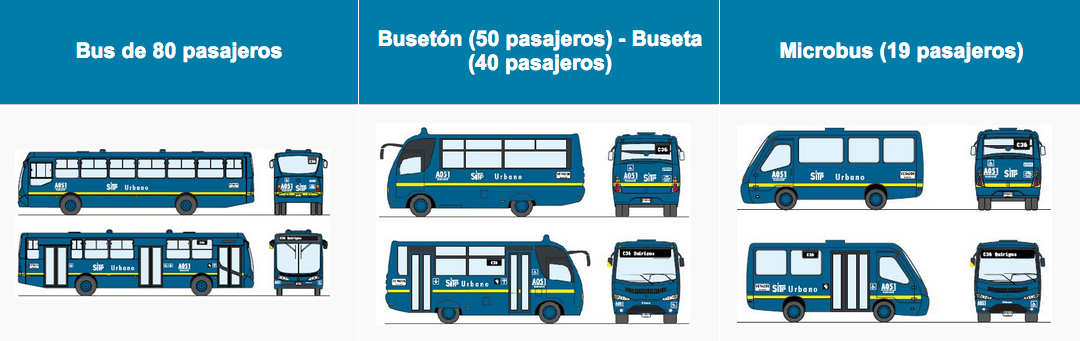

In [52]:
Image("SiTP_Capacity.png")

## Trip 1

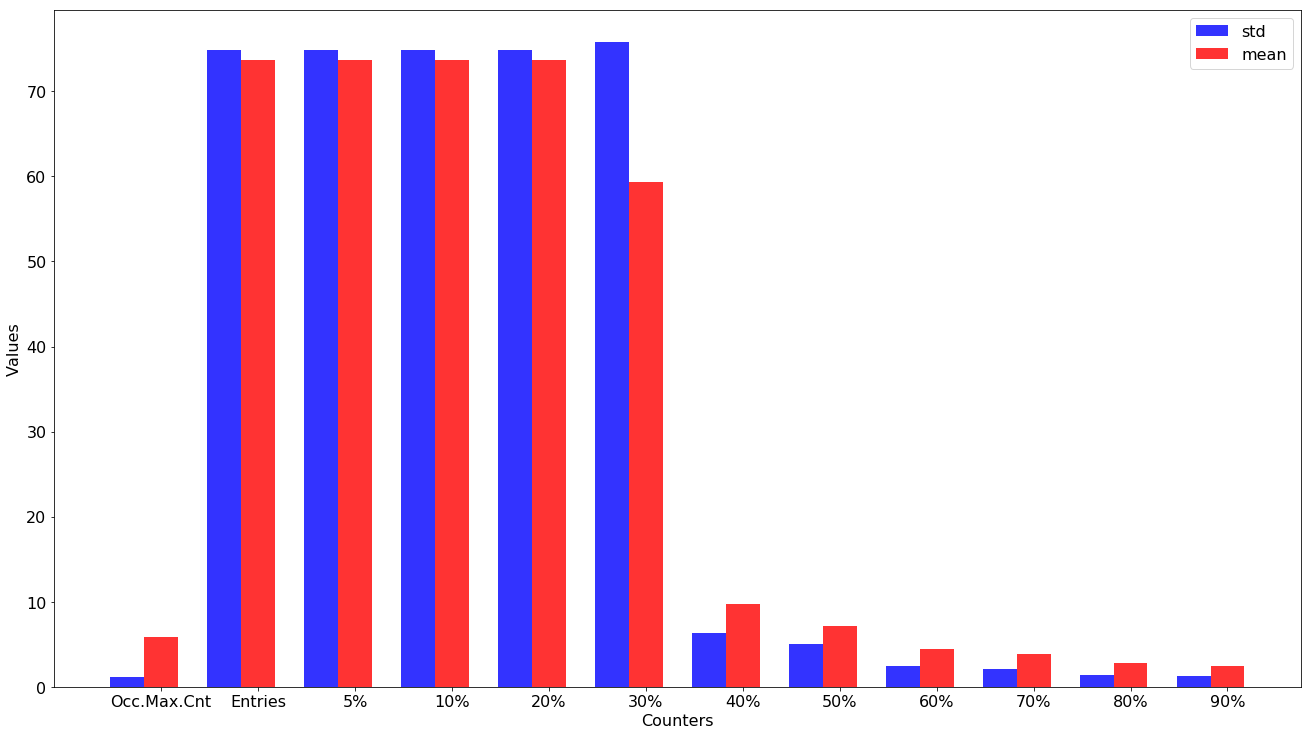

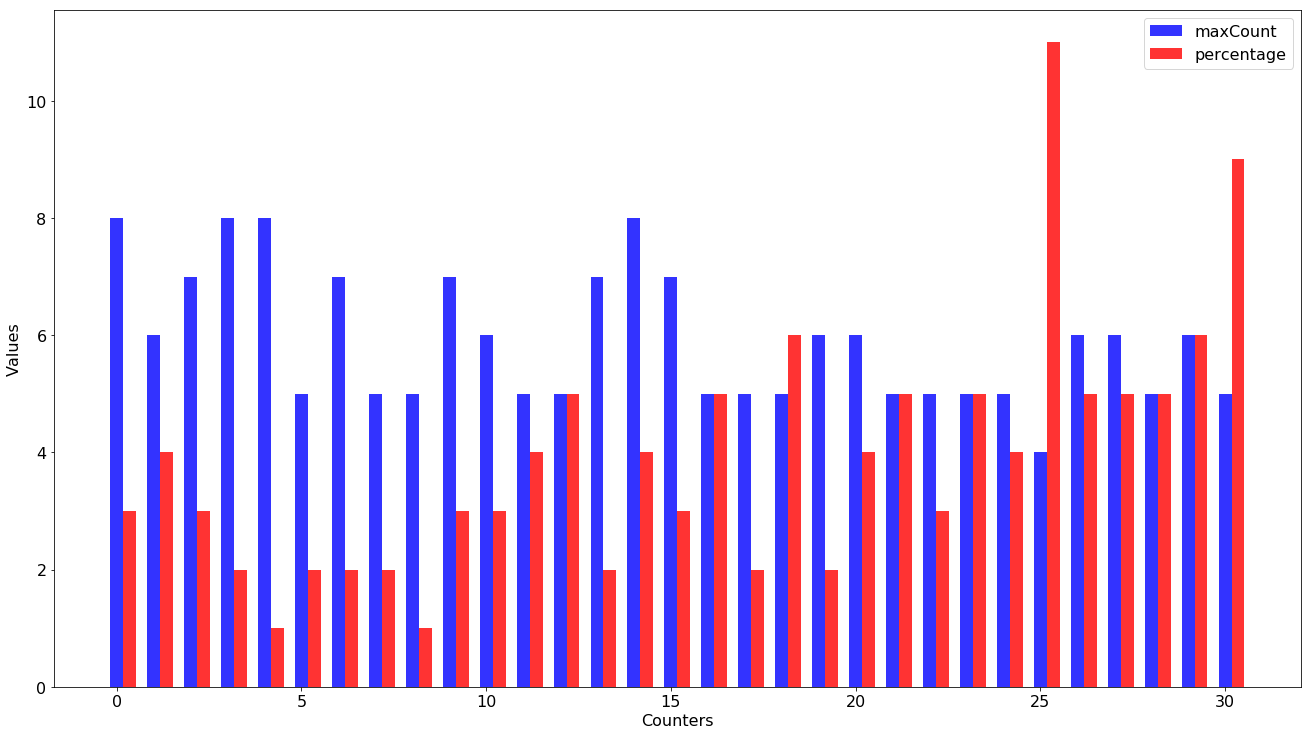

In [68]:
tripReportStatistics("Spark15wroomMay30.log")
tripReportPercentageDescription("Spark15wroomMay30.log","p70")

## Trip 2:  80 Passenger bus type.

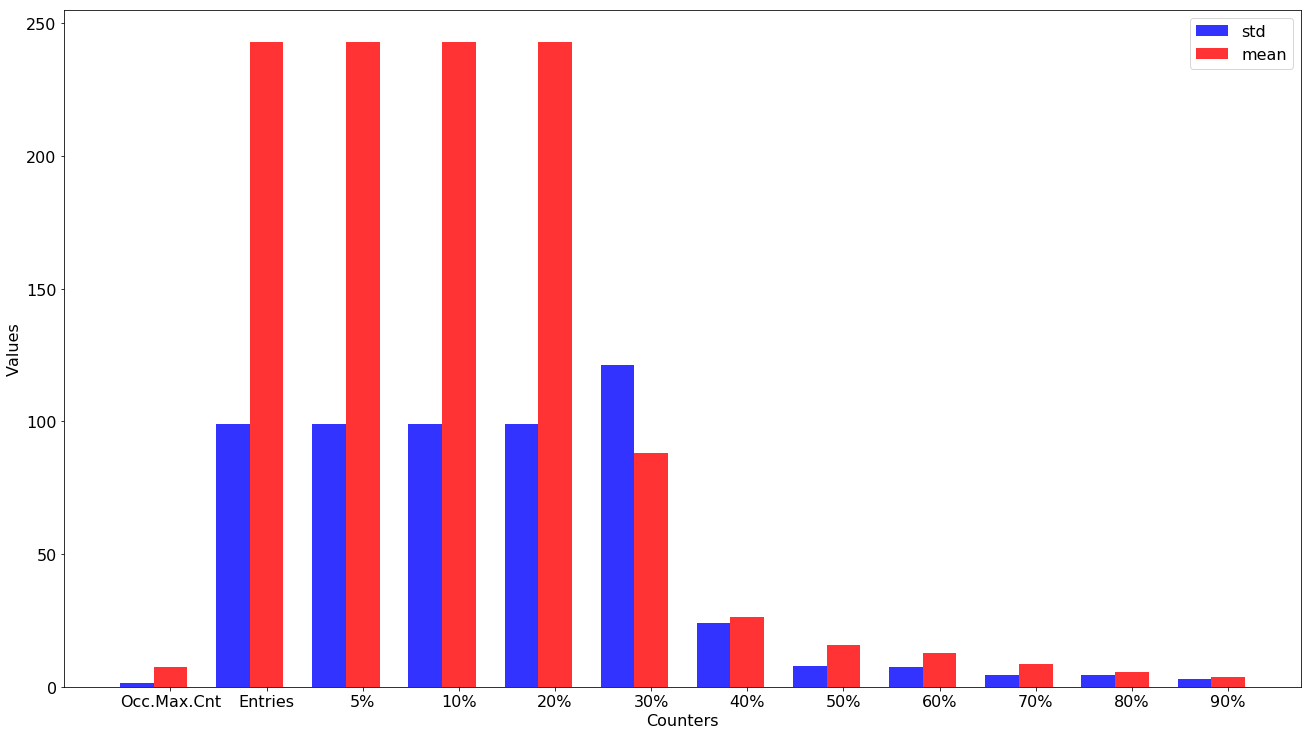

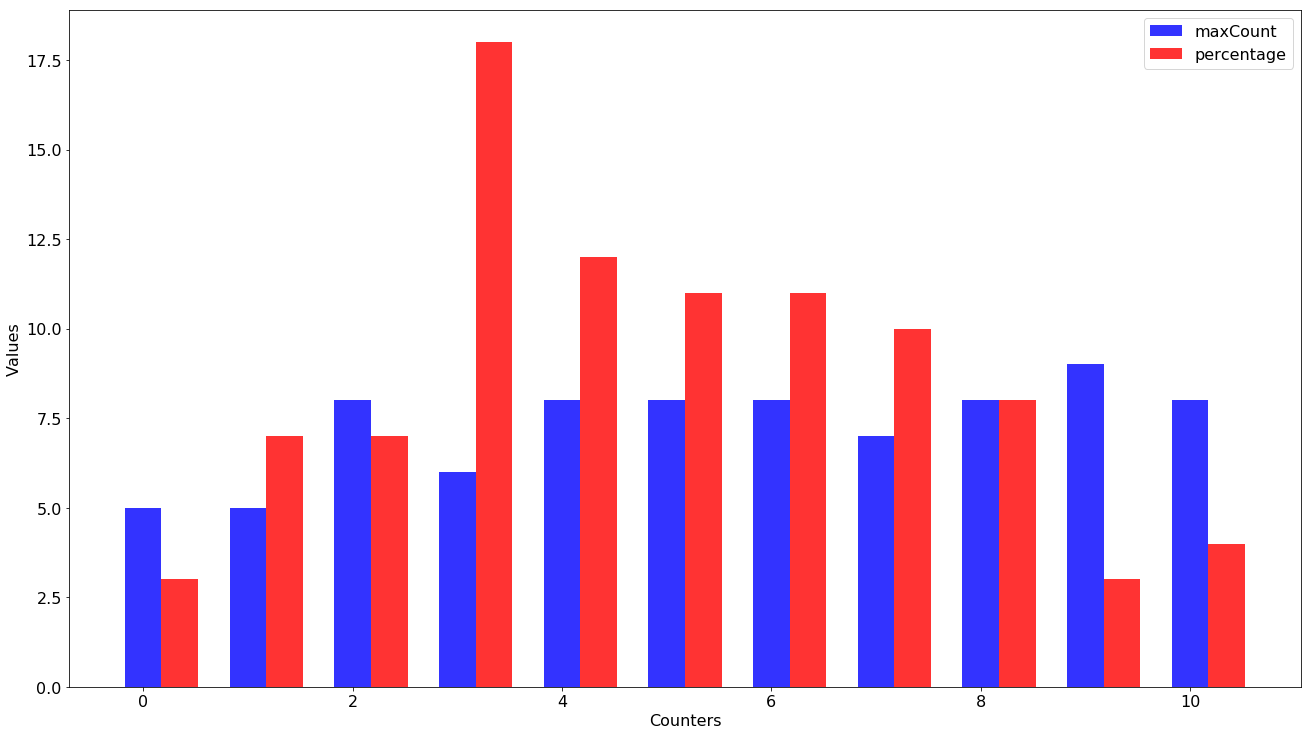

In [66]:
tripReportStatistics("Tm17wroomMay30.log")
tripReportPercentageDescription("Tm17wroomMay30.log","p70")

[0:2]: Walking around the neighborhood  
[3]: Wating at the bus station  
[4:6]: 60 passangers on average. Stop at 72 street  
[7:8]: 30 passangers on average. Stop over the 7th aveneu  
[9:10]: 7 passanger on average. Stop at Museo Nacaional  

### Trip 3: 40 Passenger bus type.


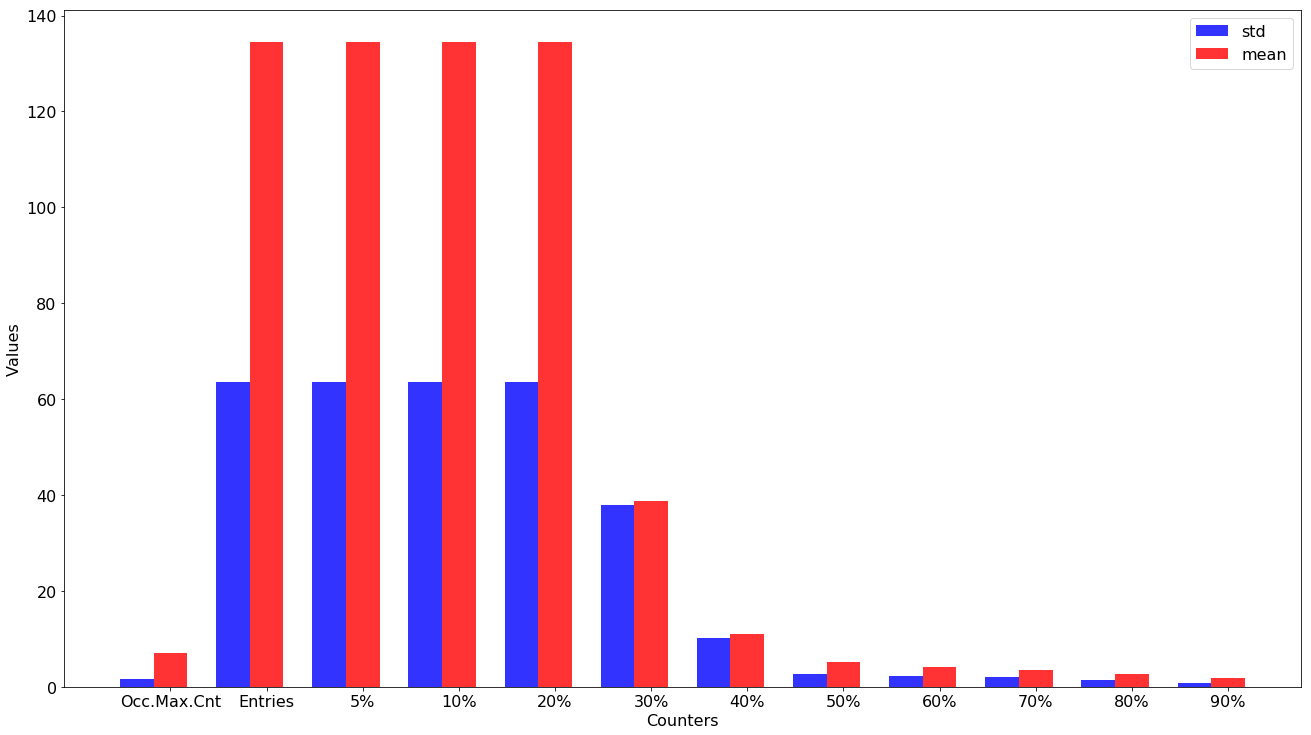

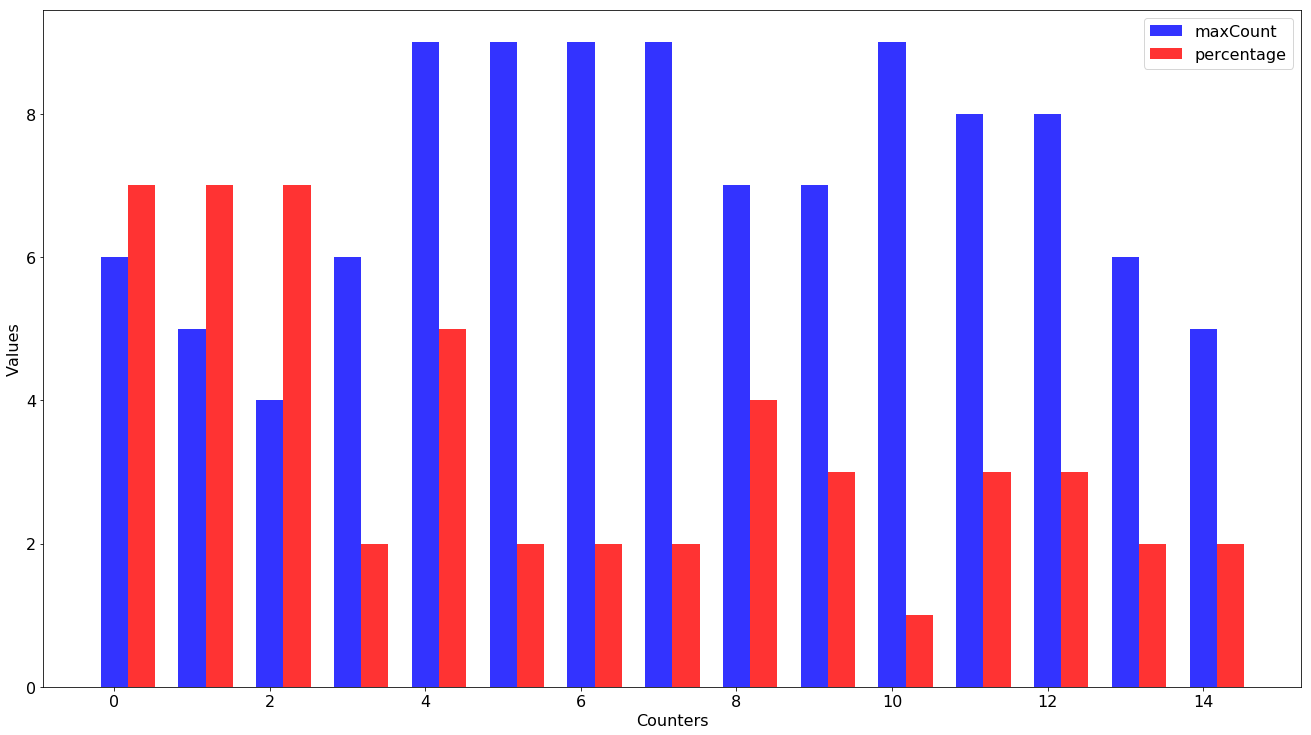

In [69]:
tripReportStatistics("Sitp16wroomMay30.log")
tripReportPercentageDescription("Sitp16wroomMay30.log","p70")

[0:2]: Wating for, over the 7th avenue.  
[3:14]:7 passangers on average along the whole trip.  